## PROJECT 1

### Part 1

#### Importing the libraries 

In [29]:
import pandas as pd
import seaborn as sns
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split

#### Working with data set project1.data

We start by downloading the file and calling it "project1.data" after that we import the data using pandas as a data structure.

In [2]:
data = pd.read_csv('project1.data') #imports the project.data and reads it as a csv
data #shows the data frame

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


#### Identifing the shape and size of the raw data

To Identify the shape and the size of the raw data we will be using the pandas library. The build in function shape and for the size we will be using checking the lenght of the data

In [3]:
data.shape #identify the shape 

(398, 9)

In [4]:
len(data) #Identify the size of the raw data 

398

#### Get information about the types of data and check if it needs any datatype conversion

In [5]:
data.info() #gets information about the dtype of each column in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


looking at the information of the data we are able to see that all the colunms have the correct data type except for the horsepower, that one need to be converted to int type
in order to make the right changes, it is important to make sure the data doesn't have empty cells

In [6]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce') #converts the values
data.info() #display the info to demonstrate the change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


#### Dropping non-important columns if needed, Is the data missing in any of the columns?

From what I am able to see all the columns are important in the data as there are no duplicates or non value columns 

In [7]:
data.isnull().sum() #checking for missing values

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

The data set is missing 6 values in the horsepower, to fix this we need to replace this values with the mean to make accurate machine learning outcomes

In [8]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

#### Deriving statistical information from the data: predicting outliers

You cannot preddict outliers from statistical information for example if we do data.describe that will give us the count meam std etc of the data base in order to look for outliers it is important to visualize the distribution of the data using box plots and look for outliers

In [9]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: xlabel='mpg'>

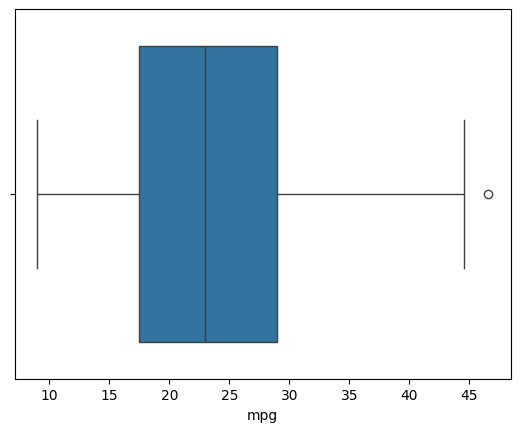

In [10]:
sns.boxplot(data=data, x='mpg')

<Axes: xlabel='horsepower'>

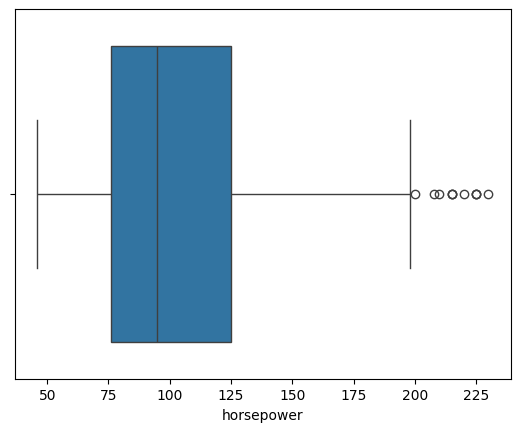

In [11]:
sns.boxplot(data=data, x='horsepower')

<Axes: xlabel='acceleration'>

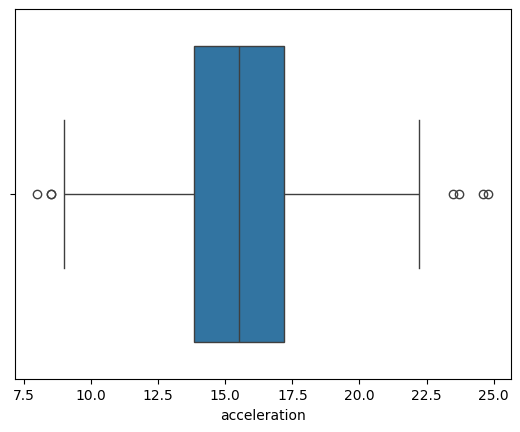

In [12]:
sns.boxplot(data=data, x='acceleration')

from the box plots we are able to see that there are outliers when taking the boxplot of accelaration, mpg and the horse power

#### One-hot encoding of categorical data

In [13]:
data['origin'] = data['origin'].astype("category")
data =  pd.get_dummies(data, columns=['origin'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
 8   origin_2      398 non-null    bool   
 9   origin_3      398 non-null    bool   
dtypes: bool(2), float64(4), int64(3), object(1)
memory usage: 25.8+ KB


#### Univariate plots

<Axes: xlabel='model_year', ylabel='Count'>

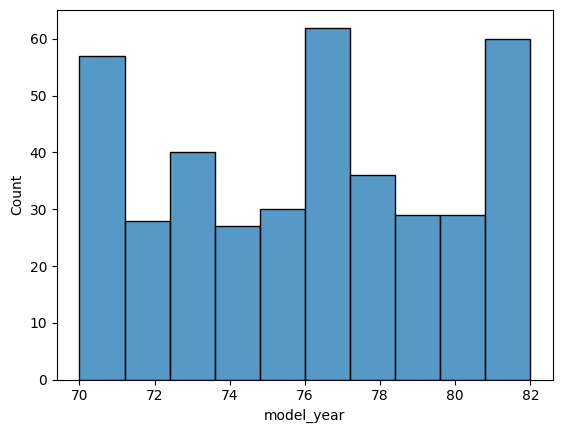

In [14]:
sns.histplot(data=data['model_year'])

Text(0.5, 1.0, 'Horsepower histogram')

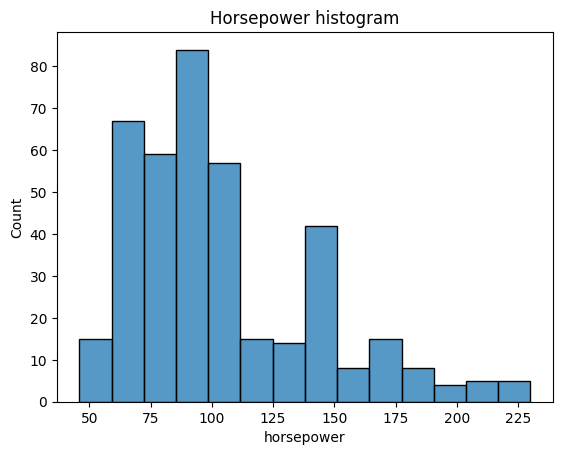

In [15]:
sns.histplot(data=data['horsepower'])
plt.title('Horsepower histogram')

Text(0.5, 1.0, 'Box Plot of MPG by Model Year')

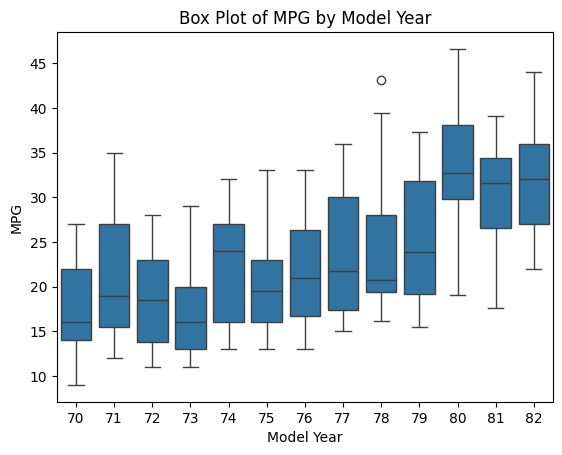

In [16]:
sns.boxplot(x='model_year', y='mpg', data=data)
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Box Plot of MPG by Model Year')

#### Bivariate Plots

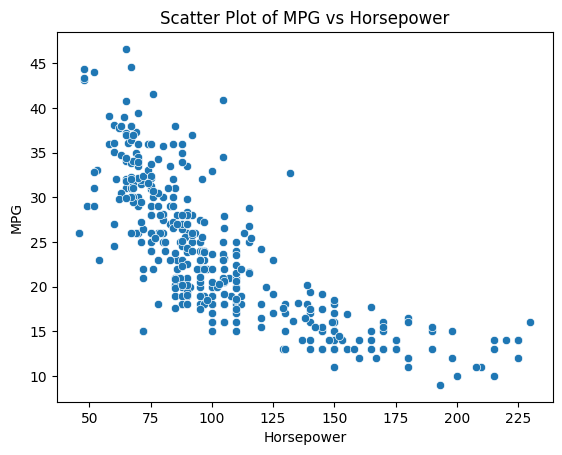

In [17]:
sns.scatterplot(x='horsepower', y='mpg', data=data)
plt.title('Scatter Plot of MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

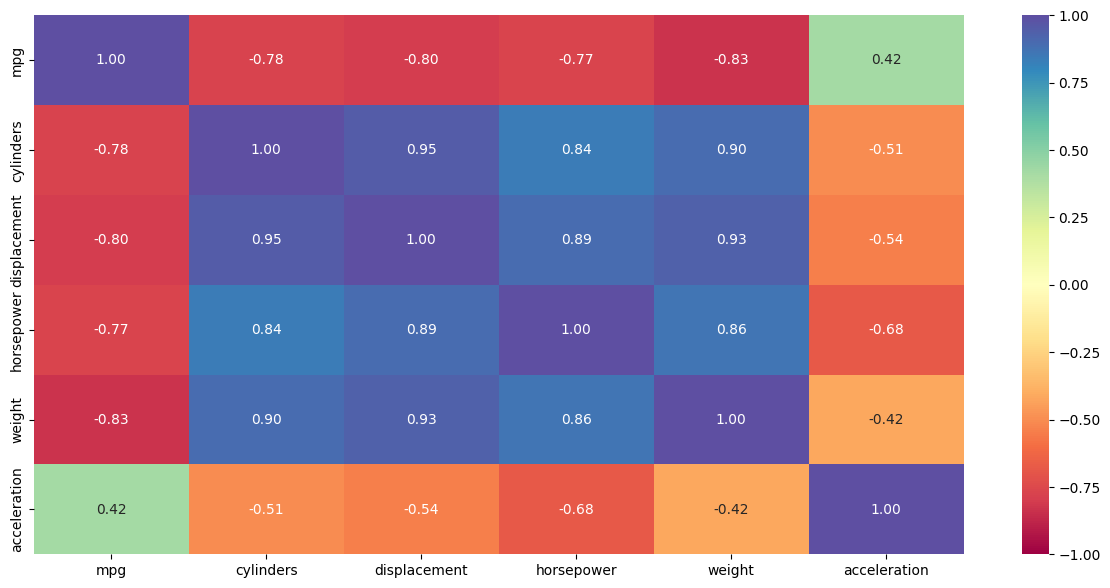

In [18]:
corr_cols=['mpg', 'cylinders','displacement','horsepower', 'weight', 'acceleration']

plt.figure(figsize=(15, 7))

# the actual heat map
sns.heatmap(
   data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# show the plot
plt.show()

#### Correlations between different columns

In [28]:
corr_cols=['mpg', 'cylinders','displacement','horsepower', 'weight', 'acceleration']
correlation_matrix = data[corr_cols].corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000


Text(0, 0.5, 'MPG')

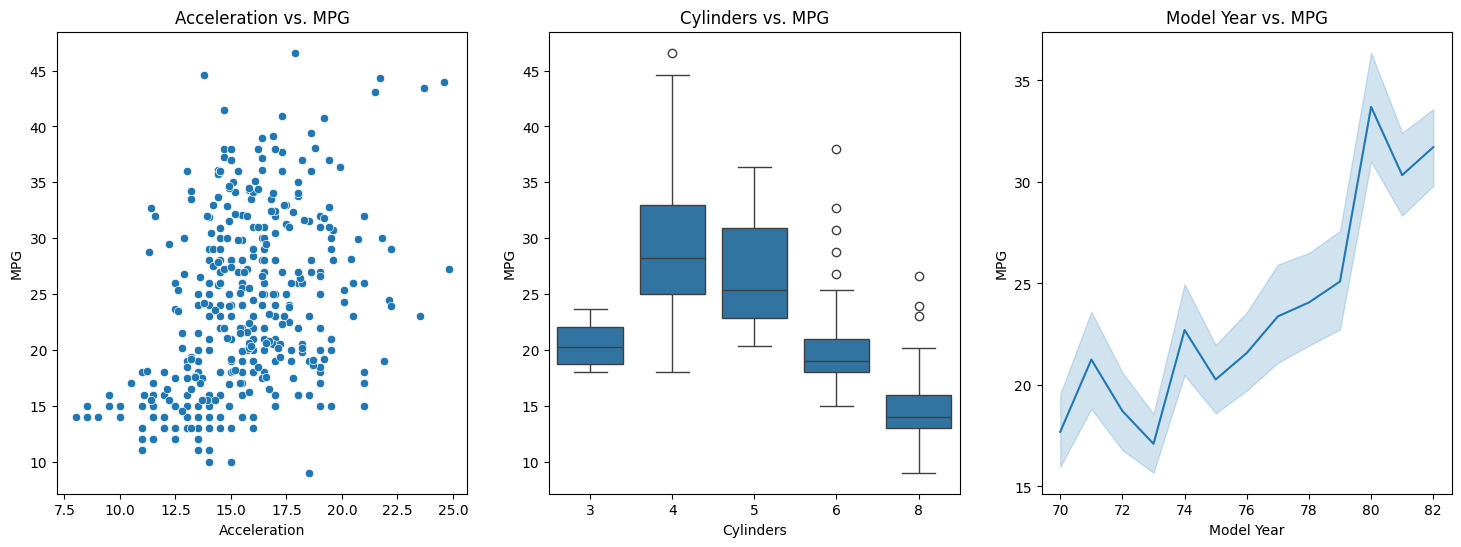

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Acceleration vs. MPG
sns.scatterplot(x='acceleration', y='mpg', data=data, ax=axes[0])
axes[0].set_title('Acceleration vs. MPG')
axes[0].set_xlabel('Acceleration')
axes[0].set_ylabel('MPG')

# Cylinders vs. MPG
sns.boxplot(x='cylinders', y='mpg', data=data, ax=axes[1])
axes[1].set_title('Cylinders vs. MPG')
axes[1].set_xlabel('Cylinders')
axes[1].set_ylabel('MPG')

sns.lineplot(x='model_year', y='mpg', data=data, ax=axes[2])
axes[2].set_title('Model Year vs. MPG')
axes[2].set_xlabel('Model Year')
axes[2].set_ylabel('MPG')

### PART 2

#### Spliting the dataset into Training and Test sets

In [32]:
X = data.drop(['mpg', 'car_name'], axis=1)  
y = data['mpg']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,False,False
1,8,350.0,165.0,3693,11.5,70,False,False
2,8,318.0,150.0,3436,11.0,70,False,False
3,8,304.0,150.0,3433,12.0,70,False,False
4,8,302.0,140.0,3449,10.5,70,False,False
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,False,False
394,4,97.0,52.0,2130,24.6,82,True,False
395,4,135.0,84.0,2295,11.6,82,False,False
396,4,120.0,79.0,2625,18.6,82,False,False
